## Importing Normalized Training Dataset

In [1]:
import pandas as pd

# getting normalized csv for training data
X_train_scaled = pd.read_csv("../dataset files/training/post_eda_train.csv")
X_train_scaled = X_train_scaled.drop(columns=['Unnamed: 0'])

# importing dataset targets
y_train_vector = pd.read_csv("../dataset files/training/madelon_train.labels", header=None, index_col=None)
y_train = y_train_vector[0].ravel()

X_train_scaled.head()
#y_train

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.560976,0.438356,0.588028,0.393939,0.255521,0.260870,0.566787,0.5,0.424528,0.375000,...,0.492958,0.529412,0.491429,0.449367,0.578947,0.330798,0.558140,0.44,0.398577,0.516667
1,0.512195,0.351598,0.316901,0.515152,0.681388,0.347826,0.693141,0.8,0.518868,0.291667,...,0.394366,0.441176,0.548571,0.263291,0.587045,0.334601,0.604651,0.57,0.523132,0.633333
2,0.609756,0.735160,0.454225,0.227273,0.242902,0.260870,0.389892,0.7,0.471698,0.458333,...,0.563380,0.529412,0.577143,0.658228,0.558704,0.391635,0.534884,0.54,0.483986,0.527778
3,0.439024,0.502283,0.492958,0.484848,0.391167,0.282609,0.299639,0.3,0.679245,0.437500,...,0.591549,0.500000,0.474286,0.559494,0.348178,0.269962,0.418605,0.47,0.466192,0.322222
4,0.536585,0.552511,0.556338,0.545455,0.299685,0.478261,0.245487,0.7,0.537736,0.270833,...,0.570423,0.470588,0.348571,0.386076,0.477733,0.418251,0.558140,0.69,0.469751,0.600000


Best estimator: 950
    estimators     score
0        100.0  0.654493
1        150.0  0.659497
2        200.0  0.671005
3        250.0  0.674001
4        300.0  0.675504
5        350.0  0.672502
6        400.0  0.673004
7        450.0  0.671009
8        500.0  0.674008
9        550.0  0.674005
10       600.0  0.674507
11       650.0  0.675004
12       700.0  0.678506
13       750.0  0.678508
14       800.0  0.680006
15       850.0  0.682009
16       900.0  0.682506
17       950.0  0.683506
18      1000.0  0.681510


<AxesSubplot:xlabel='estimators', ylabel='score'>

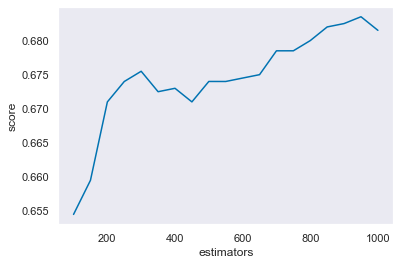

In [3]:
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score, cross_val_predict

# loop to find best number of estimators
min_estimators = 100
max_estimators = 1000
step = 50
result = []
best_score = 0
best_estimator = 0

for i in range(min_estimators, max_estimators+step, step):
    clf = RandomForestClassifier(
        n_estimators=i, 
        max_depth=None, 
        random_state=0, 
        n_jobs=-1)
    # s = make_scorer(recall_score, pos_label='bad')
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=3)
    if (scores.mean() > best_score):
        best_estimator = i
        best_score = scores.mean()
    result.append((i, scores.mean()))
    
    
# converting result into dataframe
estimators = np.array(result)[:,0]
score = np.array(result)[:,1]
d = {'estimators': estimators, 'score': score}
df_scores = pd.DataFrame(d)
print(f'Best estimator: {best_estimator}')
print(df_scores)

# plotting results
sns.set_theme(style="dark")
sns.set_palette("colorblind")
sns.lineplot(
        data=df_scores,
        x="estimators", 
        y="score"
    )

In [6]:
import seaborn as sns
import numpy as np
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict

clf = RandomForestClassifier(n_estimators=950)
clf.fit(X_train_scaled, y_train)
# s = make_scorer(recall_score, pos_label=1)
scores = cross_val_score(clf, X_train_scaled, y_train, cv=3)
y_pred = cross_val_predict(clf, X_train_scaled, y_train, cv=3)
print("accuracy_score: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

accuracy_score: 0.67751 (+/- 0.01028)


In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix

# printing confusion matrix
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[735 265]
 [364 636]]
              precision    recall  f1-score   support

          -1       0.67      0.73      0.70      1000
           1       0.71      0.64      0.67      1000

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.68      2000
weighted avg       0.69      0.69      0.68      2000

